1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


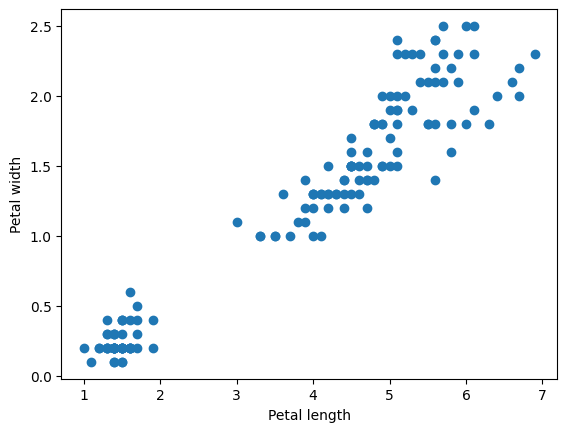

In [5]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])


# Trying number of clusters = 1

In [6]:
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df)
y_predicted

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


# Different df for different clusters

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]


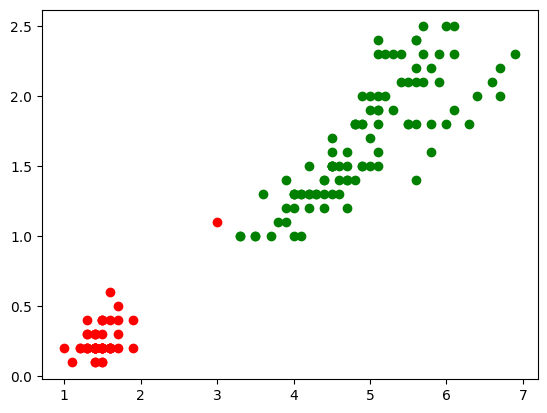

In [14]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')


# Elbow Method

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

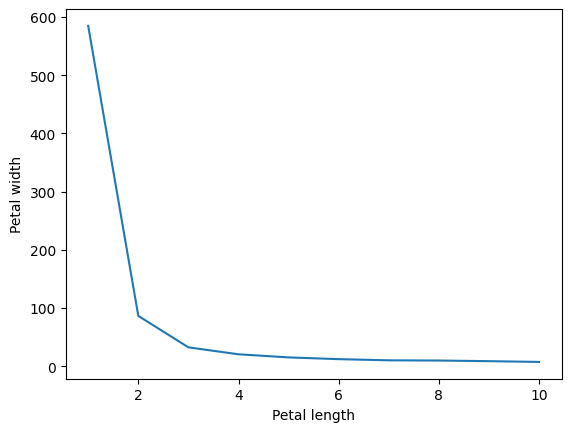

In [17]:
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)
    
    
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.plot(k_range, sse)

Answer can be 3

In [18]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
df.clusters = y_predicted
df.head()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\AppData\Local\Temp\ipykernel_39464\1815487610.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.clusters = y_predicted


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


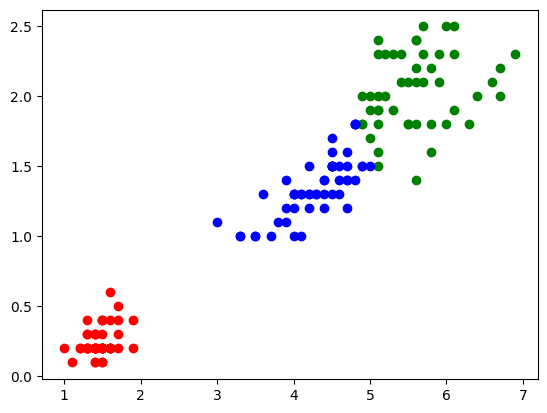

In [20]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'blue')

# Answer clusters